In [47]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = "pca_iris.data"
#* Pandas DataFrame içine yüklüyoruz

df = pd.read_csv(url, names=["Sepal Length","Sepal Width","Petal Length","Petal Width","target"])
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [48]:
features = ["Sepal Length","Sepal Width","Petal Length","Petal Width"]
#? feature ları x olarak tanımlayalım
x = df[features]

#?target'i y olarak alalım
y = df["target"]


In [49]:
 #! Değerleri Scale Etmemiz gerek.Çünkü her bir feature çok farklı boyutlarda ve bunların yapay zeka tarafından eşit ağırlıklarda dengelenmesi gerekiyor. Bu Amaçla standart scaler kullanarak tüm verileri mean=0 and variance = 1 olacak şekilde değiştiriyoruz

In [50]:
 #* Standartizing the features
x = StandardScaler().fit_transform(x)

In [51]:
 #* X'i kontrol edelim
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [52]:
 #? Veri setmiz 4 boyuta sahip: "sepal length","sepal width","petal length","petal width"
#* Bu 4 boyutu 2 boyuta indirgeyeceğiz fakat herhangi bir atma işlemi olmayacak

In [53]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDF = pd.DataFrame(data = principalComponents,columns = ["Principal Component 1","Principal Component 2"])

In [54]:
principalDF

,Principal Component 1,Principal Component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [55]:
 #?Şimdi en son target sütunumuzu da PCA dataframe'imizin sonuna ekleyelim

In [56]:
final_dataframe = pd.concat([principalDF,df[["target"]]],axis=1)
final_dataframe.head()

,Principal Component 1,Principal Component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


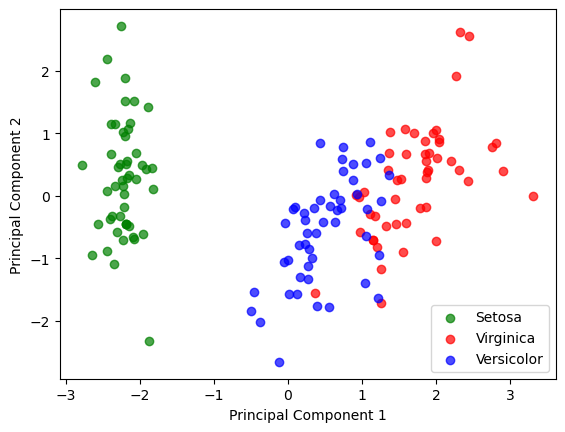

In [57]:
dfsetosa = final_dataframe[df.target=="Iris-setosa"]
dfvirginica = final_dataframe[df.target=="Iris-virginica"]
dfversicolor = final_dataframe[df.target=="Iris-versicolor"]

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

plt.scatter(dfsetosa["Principal Component 1"],dfsetosa["Principal Component 2"],color="green",alpha=0.7,label="Setosa")
plt.scatter(dfvirginica["Principal Component 1"],dfvirginica["Principal Component 2"],color = "red",alpha=0.7,label="Virginica")
plt.scatter(dfversicolor["Principal Component 1"],dfversicolor["Principal Component 2"],color = "blue",alpha=0.7,label="Versicolor")

plt.legend()
plt.show()
                           

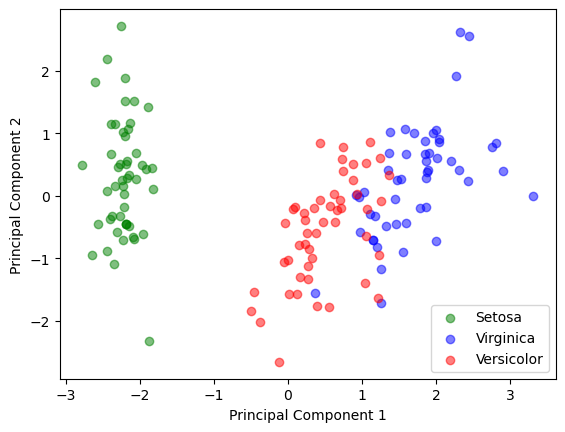

In [58]:
 #* Daha Gelişmiş bir Plottin Yapalım
targets = ["Iris-setosa","Iris-virginica","Iris-versicolor"]
colors = ["g","b","r"]

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

for target,col in zip(targets,colors):
    dftemp = final_dataframe[df.target==target]
    plt.scatter(dftemp["Principal Component 1"],dftemp["Principal Component 2"],color=col,alpha=0.5)
plt.legend(["Setosa","Virginica","Versicolor"])
plt.show()

In [59]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [60]:
print("Verimizin %",pca.explained_variance_ratio_.sum()*100,"sını koruduk")

Verimizin % 95.80097536148199 sını koruduk


In [61]:
 #? Veri Setimizin neredeyse %96 sını koruduk.